<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S9_C5_FuzzyLogic%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

Librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz # Facilita el desarrollo de sistemas difusos (fuzzy logic), para modelar incertidumbres o sistemas no lineales.
from skfuzzy import control as ctrl # Ayuda a crear variables de entrada y salida, definir reglas difusas y simular el comportamiento del sistema.

# Caso Nivel de lealtad

Una cadena de supermercados desea clasificar a sus clientes según su **nivel de lealtad** , utilizando los datos de **frecuencia de compra** y el **gasto promedio por visita**.

## Reglas (Se usó la matríz de asociación difusa)

1. **SI** El gasto es *Bajo* y la frecuencia es *Baja* **Entonces** la lealtad es *Baja*

2. **SI** El gasto es *Bajo* y la frecuencia es *Media* **Entonces** la lealtad es *Baja*

3. **SI** El gasto es *Bajo* y la frecuencia es *Alta* **Entonces** la lealtad es *Media*

4. **SI** El gasto es *Medio* y la frecuencia es *Baja* **Entonces** la lealtad es *Baja*

5. **SI** El gasto es *Medio* y la frecuencia es *Media* **Entonces** la lealtad es *Media*

6. **SI** El gasto es *Medio* y la frecuencia es *Alta* **Entonces** la lealtad es *Media*

7. **SI** El gasto es *Alto* y la frecuencia es *Baja* **Entonces** la lealtad es *Media*

8. **SI** El gasto es *Alto* y la frecuencia es *Media* **Entonces** la lealtad es *ALto*

9. **SI** El gasto es *Alto* y la frecuencia es *Alta* **Entonces** la lealtad es *Alto*

## Paso 1. Variables de Entrada

* Nivel de gasto (gasto promedio por visita)(COP) => Gasto:
{Bajo, Medio, Alto}. U : [0, 800]
* Frecuencia de compra (visitas/mes)=> Frecuencia:
 {Bajo, Medio, Alto}. U : [0, 30]

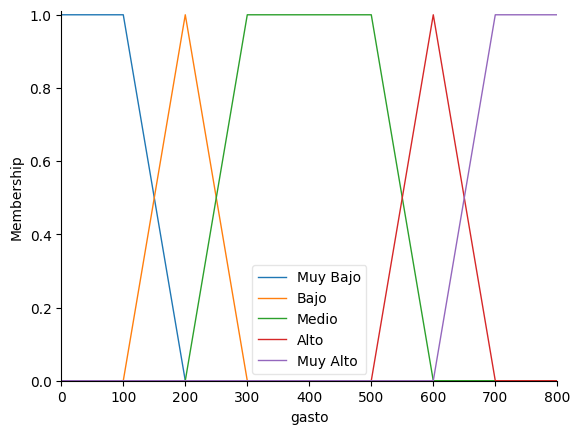

In [ ]:
gasto = ctrl.Antecedent(np.arange(0,801,1),'gasto') # Crea una variable difusa de entrada
gasto['Muy Bajo'] = fuzz.trapmf(gasto.universe, [0,0,100,200])
gasto['Bajo'] = fuzz.trimf(gasto.universe, [100,200,300])
  #fuzz.trapmf: Define una función de membresía trapezoidal (trapmf).
    #gasto.universe: Se usa para asociar la función de membresía al universo de gasto.
gasto['Medio'] = fuzz.trapmf(gasto.universe, [200,300,500,600])
gasto['Alto'] = fuzz.trimf(gasto.universe, [500,600,700])
gasto['Muy Alto'] = fuzz.trapmf(gasto.universe, [600,700,800,800])
gasto.view()

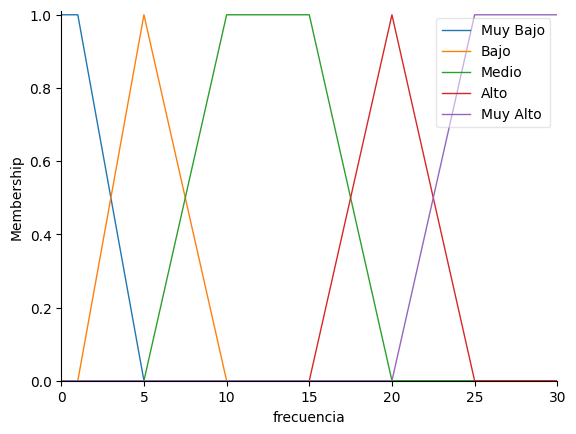

In [ ]:
# Conjuto Término - Cada Adjetivo
frecuencia = ctrl.Antecedent(np.arange(0, 31, 1), 'frecuencia')
frecuencia['Muy Bajo'] = fuzz.trapmf(frecuencia.universe, [0,0,1,5])
frecuencia['Bajo'] = fuzz.trimf(frecuencia.universe, [1,5,10])
frecuencia['Medio'] = fuzz.trapmf(frecuencia.universe, [5,10,15,20])
frecuencia['Alto'] = fuzz.trimf(frecuencia.universe, [15,20,25])
frecuencia['Muy Alto'] = fuzz.trapmf(frecuencia.universe, [20,25,30,30])
frecuencia.view()

## Paso 2. Variables de Salida

* Nivel de Lealtad => Lealtad:
{Bajo, Medio, Alto}. U : [0, 800]



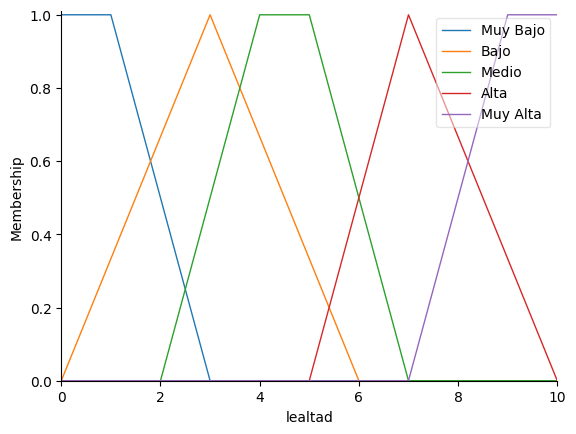

In [ ]:
lealtad = ctrl.Consequent(np.arange(0,11,1), 'lealtad') # Crea una variable difusa de salida (consecuente)
lealtad['Muy Bajo'] = fuzz.trapmf(lealtad.universe, [0,0,1,3])
lealtad['Bajo'] = fuzz.trimf(lealtad.universe, [0,3,6])
lealtad['Medio'] = fuzz.trapmf(lealtad.universe, [2,4,5,7])
lealtad['Alta'] = fuzz.trimf(lealtad.universe, [5,7,10])
lealtad['Muy Alta'] = fuzz.trapmf(lealtad.universe, [7,9,10,10])
lealtad.view()


## Paso 3. Sistema de Reglas

In [ ]:
R1 = ctrl.Rule(gasto['Muy Bajo'] & frecuencia['Muy Bajo'], lealtad['Muy Bajo'])
R2 = ctrl.Rule(gasto['Muy Bajo'] & frecuencia['Bajo'], lealtad['Muy Bajo'])
R3 = ctrl.Rule(gasto['Muy Bajo'] & frecuencia['Medio'], lealtad['Bajo'])
R4 = ctrl.Rule(gasto['Muy Bajo'] & frecuencia['Alto'], lealtad['Bajo'])
R5 = ctrl.Rule(gasto['Muy Bajo'] & frecuencia['Muy Alto'], lealtad['Bajo'])

R6 = ctrl.Rule(gasto['Bajo'] & frecuencia['Muy Bajo'], lealtad['Muy Bajo'])
R7 = ctrl.Rule(gasto['Bajo'] & frecuencia['Bajo'], lealtad['Bajo']) # ctrl.Rule: Define una regla de inferencia difusa en el sistema.
R8 = ctrl.Rule(gasto['Bajo'] & frecuencia['Medio'], lealtad['Bajo'])
R9 = ctrl.Rule(gasto['Bajo'] & frecuencia['Alto'], lealtad['Medio'])
R10 = ctrl.Rule(gasto['Bajo'] & frecuencia['Muy Alto'], lealtad['Medio'])

R11 = ctrl.Rule(gasto['Medio'] & frecuencia['Muy Bajo'], lealtad['Muy Bajo'])
R12 = ctrl.Rule(gasto['Medio'] & frecuencia['Bajo'], lealtad['Bajo'])
R13 = ctrl.Rule(gasto['Medio'] & frecuencia['Medio'], lealtad['Medio'])
R14 = ctrl.Rule(gasto['Medio'] & frecuencia['Alto'], lealtad['Alta'])
R15 = ctrl.Rule(gasto['Medio'] & frecuencia['Muy Alto'], lealtad['Alta'])

R16 = ctrl.Rule(gasto['Alto'] & frecuencia['Muy Bajo'], lealtad['Bajo'])
R17 = ctrl.Rule(gasto['Alto'] & frecuencia['Bajo'], lealtad['Medio'])
R18 = ctrl.Rule(gasto['Alto'] & frecuencia['Medio'], lealtad['Alta'])
R19 = ctrl.Rule(gasto['Alto'] & frecuencia['Alto'], lealtad['Alta'])
R20 = ctrl.Rule(gasto['Alto'] & frecuencia['Muy Alto'], lealtad['Muy Alta'])

R21 = ctrl.Rule(gasto['Muy Alto'] & frecuencia['Muy Bajo'], lealtad['Medio'])
R22 = ctrl.Rule(gasto['Muy Alto'] & frecuencia['Bajo'], lealtad['Medio'])
R23 = ctrl.Rule(gasto['Muy Alto'] & frecuencia['Medio'], lealtad['Alta'])
R24 = ctrl.Rule(gasto['Muy Alto'] & frecuencia['Alto'], lealtad['Muy Alta'])
R25 = ctrl.Rule(gasto['Muy Alto'] & frecuencia['Muy Alto'], lealtad['Muy Alta'])

# Paso 4. Inferencia

In [ ]:
sys = ctrl.ControlSystem([R1,R2,R3,R4,R5,R6,R7,R8,R9,
                          R10,R11,R12,R13,R14,R15,R16,
                          R17,R18,R19,R20,R21,R22,R23,
                          R24,R25]) # Crea un sistema de control difuso que utiliza un conjunto de reglas.

sim = ctrl.ControlSystemSimulation(sys) # Crea una instancia del sistema de control difuso para realizar simulaciones

# Paso 5. Evaluar en un punto

* Dar los valores en la entrada de gasto y frecuencia y recibir el nivel de lealtad

Punto de prueba : Gasto = 400, Frecuencia = 30

El nivel de lealtad =  8.916666666666666


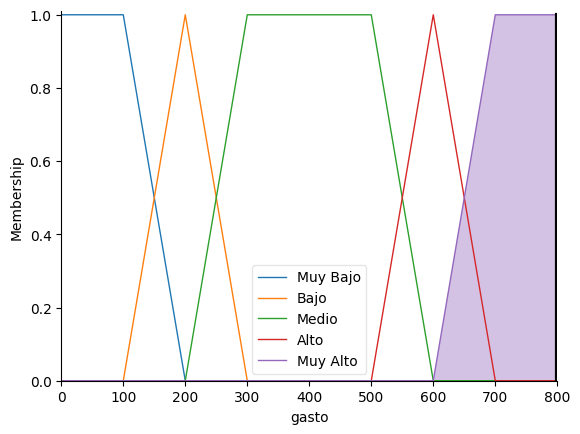

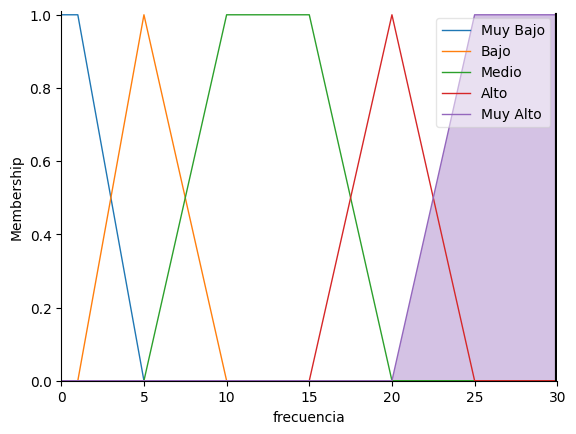

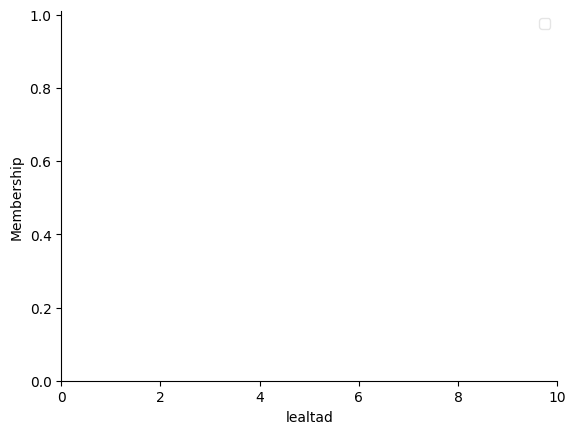

In [ ]:
# texting
sim.input['gasto'] = 800
sim.input['frecuencia'] = 30
sim.compute()
print("El nivel de lealtad = ", sim.output['lealtad'])
# grafica
gasto.view(sim=sim)
frecuencia.view(sim=sim)
lealtad.view(sim=sim)

# Parte 6. Gráfica de la señal de salida

In [ ]:
lealtad = ctrl.Consequent(np.arange(0,11,1), 'lealtad') # Crea una variable difusa de salida (consecuente)

gasto_eje = np.linspace(0,800,50)
frecu_eje = np.linspace(0,30,50)

x, y = np.meshgrid(gasto_eje, frecu_eje)
z = np.zeros_like(x)

for g in range(len(gasto_eje)):
    for f in range(len(frecu_eje)):
        sim.input['gasto'] = x[g, f]
        sim.input['frecuencia'] = y[g, f]
        sim.compute()
        z[g, f] = sim.output['lealtad']



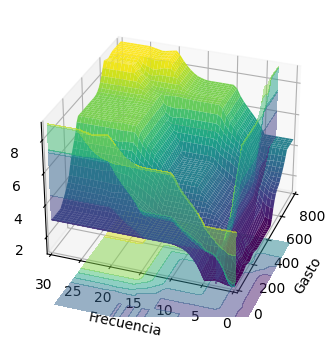

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset=3, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset=3, cmap='viridis', alpha=0.5)

ax.set_xlabel('Gasto')
ax.set_ylabel('Frecuencia')
ax.set_zlabel('Lealtad')

ax.set_xlim(0, 800)
ax.set_ylim(0, 30)

ax.view_init(30, 200)

** Observaciones**
la altura define la 'Lealtad', por lo tanto con los colores de la grafica podemos entender que los resultados bajos son oscuros y los calidos son los mas leales

In [ ]:
import plotly.graph_objects as go
# Crear la gráfica interactiva 3D
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
# Personalizar el diseño de la gráfica
fig.update_layout(
    title="Sistema de Control Difuso - Lealtad 3D",
    scene=dict(
        xaxis_title="Gasto ($)",
        yaxis_title="Frecuencia (visitas/mes)",
        zaxis_title="Lealtad"),
    template="plotly_dark")
# Mostrar la gráfica interactiva
fig.show()